# PreProcessing using scikit-learn


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">
## Agenda
1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. Text Processing
12. CountVectorizer
13. TfIdf
14. HashingVectorizer
15. Image using skimage

#### Common import

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* If data is not normally distributed, this is not the best scaler to use.

In [23]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
df

,x1,x2,x3
0,-0.932916,5.681329,-6.364337
1,-0.033733,0.666332,-11.619085
2,-2.094524,4.576242,-0.581967
3,-1.471059,2.422708,-7.512734
4,-2.677283,5.047500,-11.856722
5,4.137943,6.065220,1.125093
6,-0.410609,4.686580,-7.290708
7,0.191678,7.771750,-8.708678
8,-1.339014,3.525885,-2.150540
9,0.963888,9.492734,-11.304852


In [21]:
a=np.random.normal(10,5,100)
a

array([ 0.30872078, 16.81922163, 14.23921285,  8.59478208, 12.58312339,
       14.27989823, 12.87109329,  2.2383759 ,  2.3600088 , 16.9225993 ,
        3.07478999,  9.12687514,  9.388576  , 18.51737046,  2.57982882,
        7.72626438,  4.46536654, 10.09796432,  9.33049338, 11.20069332,
       11.8184572 ,  4.13082298, 11.80707872,  9.40213389,  9.62280368,
        4.55067458, -1.30714308,  9.01066451, 14.04588224,  7.88970945,
       13.11942796, 11.58467064, 17.14470582,  1.10471989,  5.42028389,
       10.75913673, 17.92243533, 12.41908841, 14.8214432 ,  7.76750302,
       19.75095911,  7.60444404,  8.27641217, 14.13144731, 13.54760932,
       13.2794879 , 16.37472473,  9.41246453, 13.59676899,  1.93709442,
       10.65301843,  1.6027179 , 12.49919387,  4.12489468, 10.69310205,
       19.74230247,  4.53923623, 13.63358184,  6.72397723,  6.37445988,
        8.26696252, 11.75396622,  5.51539062,  6.65576976,  9.96408084,
       18.65509743, 11.6325495 ,  8.38002262, 20.03757198, 15.26

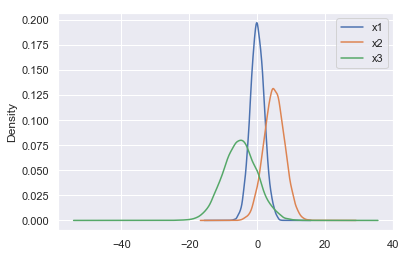

In [24]:
# plotting data

df.plot.kde()

In [8]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [9]:
data_tf = standardscaler.fit_transform(df)

In [11]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df

,x1,x2,x3
0,-1.038578,-1.226976,3.326911
1,1.539987,-0.044127,-1.239969
2,1.377829,0.496446,0.245341
3,0.423287,0.112559,-0.315720
4,0.037734,-0.815580,1.015285
5,-0.869186,-0.022554,0.627827
6,-0.518981,0.664481,1.396474
7,-1.222049,-2.188148,0.039381
8,-1.240382,-0.078154,2.696193
9,-1.043825,-1.271383,-1.197392


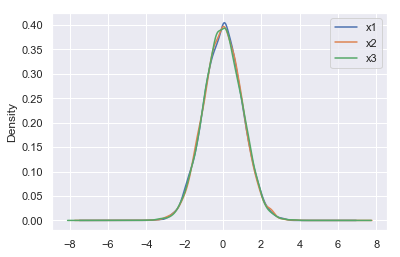

In [12]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [13]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

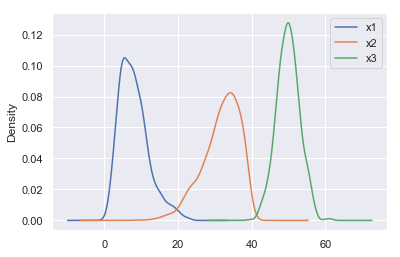

In [14]:
df.plot.kde()

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

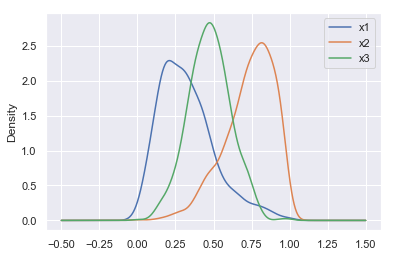

In [18]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [33]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 100), np.random.normal(1, 1, 5)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(20, 1, 100), np.random.normal(50, 1, 5)]),
})

In [34]:
df

,x1,x2
0,18.321422,19.732565
1,19.928275,19.122575
2,19.630305,19.455486
3,20.080750,20.815584
4,21.891626,22.427371
5,19.189327,20.699203
6,21.121190,21.307440
7,22.949390,18.763033
8,20.134485,18.834975
9,18.519203,19.866861


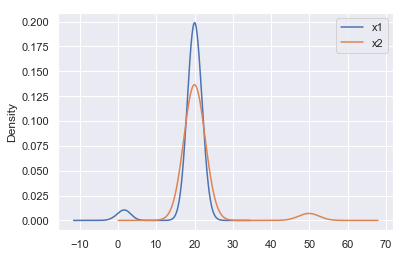

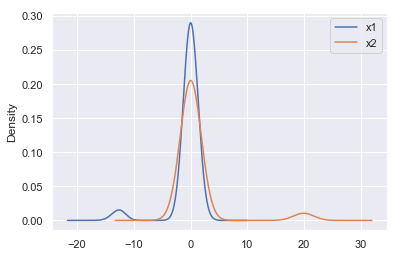

In [37]:
df.plot.kde()
df1.plot.kde()

In [35]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [36]:
data_tf = robustscaler.fit_transform(df)
df1 = pd.DataFrame(data_tf, columns=['x1','x2'])

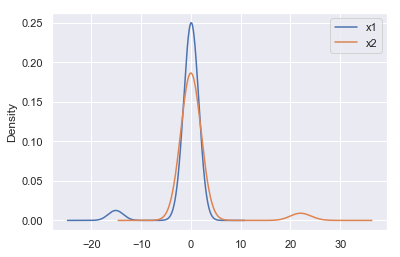

In [31]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [41]:
df = pd.DataFrame({
    'x1': np.random.randint(-50, 50, 1000).astype(float),
    'y1': np.random.randint(-40, 40, 1000).astype(float),
    'z1': np.random.randint(-70, 70, 1000).astype(float),
})

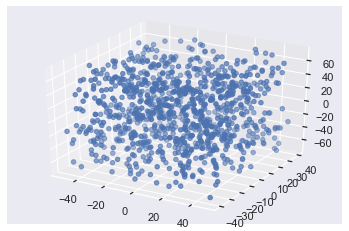

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [43]:
from sklearn.preprocessing import Normalizer

In [44]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [45]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

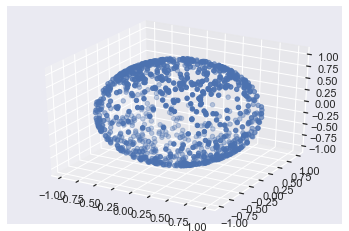

In [46]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [47]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [48]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [49]:
data_tf = binarizer.fit_transform(X)

In [50]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [51]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [52]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [53]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [54]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [55]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [58]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [59]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [60]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

C:\Users\Bal\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [62]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})
df

,A,B
0,1.0,3.0
1,2.0,4.0
2,3.0,1.0
3,4.0,NaN
4,NaN,4.0
5,7.0,5.0


In [67]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median', axis=1)

C:\Users\Bal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [68]:
imputer.fit_transform(df)

array([[1., 3.],
       [2., 4.],
       [3., 1.],
       [4., 4.],
       [4., 4.],
       [7., 5.]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with linear regression to learn model of higher degree

In [6]:
df = pd.DataFrame({'A':[1,2,3,4,6], 'B':[2,3,4,5,7]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,6,7


In [7]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)

In [8]:
pol.fit_transform(df)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,  36.,  42.,  49., 216., 252., 294., 343.]])

## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [10]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [11]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [12]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [85]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [134]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [135]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [136]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [137]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'is': 6,
 'mission': 7,
 'one': 8,
 'second': 9,
 'the': 10,
 'third': 11,
 'this': 12}

In [138]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [139]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'mission': 6,
 'one': 7,
 'second': 8,
 'third': 9,
 'this': 10}

In [140]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]], dtype=int64)

In [142]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [143]:
cv.vocabulary_

{'and': 0,
 'and the': 1,
 'awesome': 2,
 'awesome food': 3,
 'document': 4,
 'document awesome': 5,
 'first': 6,
 'first document': 7,
 'food': 8,
 'impossible': 9,
 'is': 10,
 'is mission': 11,
 'is the': 12,
 'is this': 13,
 'mission': 14,
 'mission impossible': 15,
 'one': 16,
 'one the': 17,
 'second': 18,
 'second document': 19,
 'second second': 20,
 'the': 21,
 'the first': 22,
 'the is': 23,
 'the second': 24,
 'the third': 25,
 'third': 26,
 'third one': 27,
 'this': 28,
 'this is': 29,
 'this the': 30}

## 13. TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [73]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [74]:
vectorizer.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

## 14. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with lakhs of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [75]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [76]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## 15. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install skimage'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [144]:
from skimage.io import imread,imshow

In [145]:
image = imread('frustrated+user.jpg')

In [146]:
image.shape

(282, 425, 3)

In [80]:
image[0]

array([[143, 164, 145],
       [144, 167, 147],
       [144, 167, 147],
       ...,
       [138, 165, 146],
       [141, 164, 146],
       [140, 163, 145]], dtype=uint8)

C:\Users\awant\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


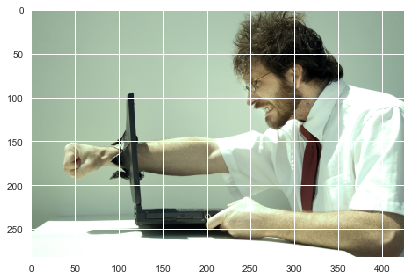

In [81]:
imshow(image)

In [82]:
from skimage.color import rgb2gray

In [83]:
rgb2gray(image).shape

(282, 425)

C:\Users\awant\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


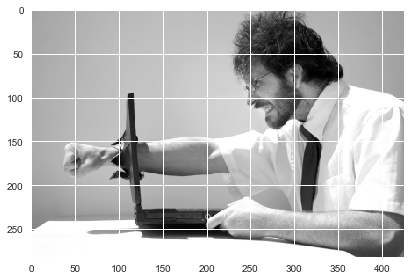

In [84]:
imshow(rgb2gray(image))

In [85]:
from skimage.transform import resize

C:\Users\awant\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\awant\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


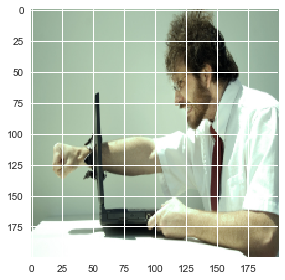

In [86]:
imshow(resize(image, (200,200)))